Name: zixian he

USC ID: 6561586967

In [1]:
rm(list=ls())
library(survival)
library(tidyverse)
library(MASS)
library(ggplot2)
library(survminer)

pbcseq
data(pbc, package="survival")

Warning message:
“package ‘tidyverse’ was built under R version 4.1.2”
Warning message:
“package ‘tibble’ was built under R version 4.1.2”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘forcats’ was built under R version 4.1.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘MASS’ was built under R version 4.1.2”

Attaching package: ‘MASS’


The following object is masked from ‘pa

id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage
<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
1,400,2,1,58.76523,f,0,1,1,1,1.0,14.5,261,2.60,1718,138.0,190,12.2,4
1,400,2,1,58.76523,f,192,1,1,1,1.0,21.3,NA,2.94,1612,6.2,183,11.2,4
2,5169,0,1,56.44627,f,0,0,1,1,0.0,1.1,302,4.14,7395,113.5,221,10.6,3
2,5169,0,1,56.44627,f,182,0,1,1,0.0,0.8,NA,3.60,2107,139.5,188,11.0,3
2,5169,0,1,56.44627,f,365,0,1,1,0.0,1.0,NA,3.55,1711,144.2,161,11.6,3
2,5169,0,1,56.44627,f,768,0,1,1,0.0,1.9,NA,3.92,1365,144.2,122,10.6,3
2,5169,0,1,56.44627,f,1790,1,1,1,0.5,2.6,230,3.32,1110,131.8,135,11.3,3
2,5169,0,1,56.44627,f,2151,1,1,1,1.0,3.6,NA,2.92,996,131.8,100,11.5,3
2,5169,0,1,56.44627,f,2515,1,1,1,1.0,4.2,NA,2.73,860,145.7,103,11.5,3


In [3]:
## (b)
S = Surv(pbcseq$day, pbcseq$futime, pbcseq$status)

Warning message in Surv(pbcseq$day, pbcseq$futime, pbcseq$status):
“Invalid status value, converted to NA”


In [4]:
## (c)
### (i)
# The Kaplan-Meier estimator plus the empirical distribution function of X is 1. 
# S(t) = 1 - F(t)

Warning message in Surv(futime, status):
“Invalid status value, converted to NA”


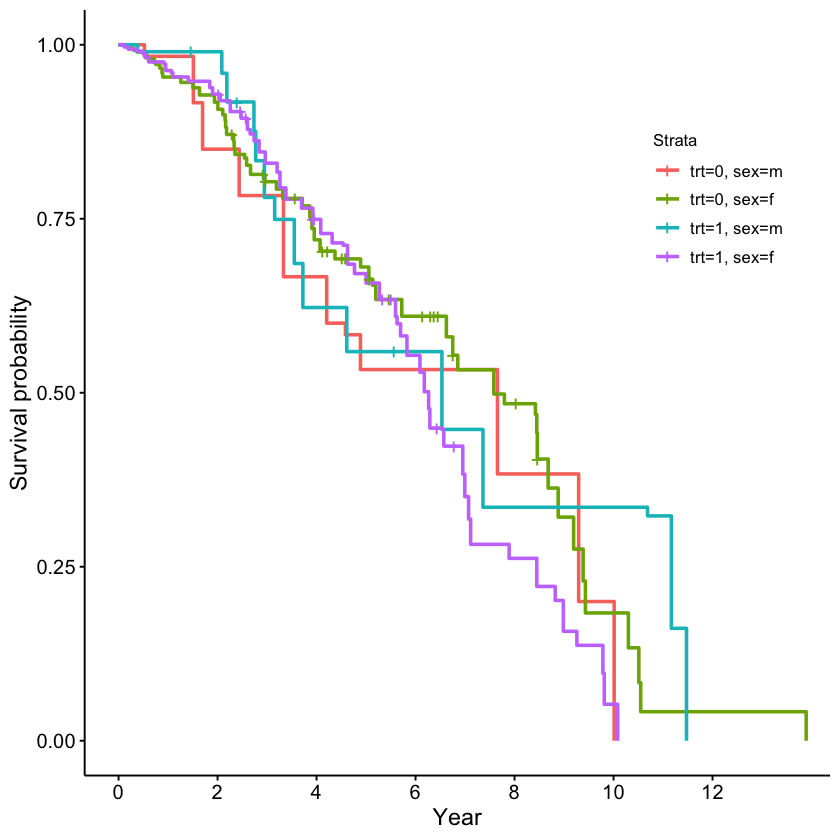

In [5]:
### (ii)
# Build the Kaplan-Meier estimator for each level of the covariates drug and sex
fit <- survfit(Surv(futime, status) ~ trt + sex, data = pbcseq)

# Plot the estimator for all of the levels of each covariate on the same figure
ggsurvplot(fit, xscale="d_y", xlab="Year", break.time.by = 365.25*2,
           legend = c(0.85, 0.75), ylim=c(0,1))

In [6]:
### (iii)
S2 = Surv(pbcseq$futime,  pbcseq$status)
survdiff(Surv(futime, status) ~ trt + sex, data = pbcseq)
# Since the p-value is 5e-08 which is quite smaller than 0.05, we will reject 
# the null hypothesis and conclude that sex and drug have significantly 
# different Kaplan-Meier survival functions.
# The log-rank test statistic follows chi-square distribution, 
# and it is calculated by comparing the observed and expected number of 
# events in each group at each time point.

Warning message in Surv(pbcseq$futime, pbcseq$status):
“Invalid status value, converted to NA”
Warning message in Surv(futime, status):
“Invalid status value, converted to NA”


Call:
survdiff(formula = Surv(futime, status) ~ trt + sex, data = pbcseq)

n=872, 1073 observations deleted due to missingness.

               N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0, sex=m  60       60     53.8     0.713     0.807
trt=0, sex=f 388      300    339.6     4.623     9.353
trt=1, sex=m 100       87    117.3     7.828    11.544
trt=1, sex=f 324      278    214.3    18.955    29.384

 Chisq= 37  on 3 degrees of freedom, p= 5e-08 

In [7]:
## (e)
### (i)
pbcseq$log_alk_pho = log(pbcseq$alk.phos)
pbcseq$log_platelet = log(pbcseq$platelet)

In [8]:
### (ii)
colSums(is.na(pbcseq))
str(pbcseq)
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv <- uniqv[is.na(uniqv)==FALSE]
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

#### mode
pbcseq$ascites <- replace_na(pbcseq$ascites, getmode(pbcseq$ascites))
pbcseq$hepato <- replace_na(pbcseq$hepato, getmode(pbcseq$hepato))
pbcseq$spiders <- replace_na(pbcseq$spiders, getmode(pbcseq$spiders))
pbcseq$chol <- replace_na(pbcseq$chol, getmode(pbcseq$chol))

#### mean
pbcseq$log_alk_pho <- replace_na(pbcseq$log_alk_pho, mean(pbcseq$log_alk_pho, na.rm=T))
pbcseq$log_platelet <- replace_na(pbcseq$log_platelet, mean(pbcseq$log_platelet, na.rm=T))

id       futime       status          trt          age          sex 
           0            0            0            0            0            0 
         day      ascites       hepato      spiders        edema         bili 
           0           60           61           58            0            0 
        chol      albumin     alk.phos          ast     platelet      protime 
         821            0           60            0           73            0 
       stage  log_alk_pho log_platelet 
           0           60           73

'data.frame':	1945 obs. of  21 variables:
 $ id          : int  1 1 2 2 2 2 2 2 2 2 ...
 $ futime      : int  400 400 5169 5169 5169 5169 5169 5169 5169 5169 ...
 $ status      : int  2 2 0 0 0 0 0 0 0 0 ...
 $ trt         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age         : num  58.8 58.8 56.4 56.4 56.4 ...
 $ sex         : Factor w/ 2 levels "m","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ day         : int  0 192 0 182 365 768 1790 2151 2515 2882 ...
 $ ascites     : int  1 1 0 0 0 0 1 1 1 1 ...
 $ hepato      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ spiders     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ edema       : num  1 1 0 0 0 0 0.5 1 1 1 ...
 $ bili        : num  14.5 21.3 1.1 0.8 1 1.9 2.6 3.6 4.2 3.6 ...
 $ chol        : int  261 NA 302 NA NA NA 230 NA NA 244 ...
 $ albumin     : num  2.6 2.94 4.14 3.6 3.55 3.92 3.32 2.92 2.73 2.8 ...
 $ alk.phos    : int  1718 1612 7395 2107 1711 1365 1110 996 860 779 ...
 $ ast         : num  138 6.2 113.5 139.5 144.2 ...
 $ platelet    : int  190 183 221 188 161 122 135 

In [9]:
### (iii)
initial_model <- coxph(S2 ~ trt + bili, data = pbcseq)
summary(initial_model)

Call:
coxph(formula = S2 ~ trt + bili, data = pbcseq)

  n= 872, number of events= 725 
   (1073 observations deleted due to missingness)

         coef exp(coef) se(coef)     z Pr(>|z|)    
trt  0.211443  1.235460 0.075559 2.798  0.00514 ** 
bili 0.046886  1.048002 0.005557 8.437  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     exp(coef) exp(-coef) lower .95 upper .95
trt      1.235     0.8094     1.065     1.433
bili     1.048     0.9542     1.037     1.059

Concordance= 0.621  (se = 0.012 )
Likelihood ratio test= 66.87  on 2 df,   p=3e-15
Wald test            = 77.16  on 2 df,   p=<2e-16
Score (logrank) test = 79.08  on 2 df,   p=<2e-16


In [10]:
### (iv)
Scope = list(upper=~trt+bili+age+sex+ascites+hepato+spiders+edema+chol+albumin+ast+protime+stage+log_alk_pho+log_platelet, 
             lower=~trt+bili)
final_m <- stepAIC(initial_model, direction="forward", 
                       scope=Scope, trace = FALSE)
final_m$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,723,8205.366,8209.366
+ age,1,28.302293,722,8177.064,8183.064
+ log_alk_pho,1,38.615166,721,8138.449,8146.449
+ stage,1,23.718625,720,8114.730,8124.730
+ hepato,1,10.996830,719,8103.733,8115.733
+ chol,1,4.051505,718,8099.682,8113.682
+ sex,1,3.811282,717,8095.870,8111.870
+ spiders,1,2.796334,716,8093.074,8111.074


In [11]:
### (v)
summary(final_m)
anova(final_m)
# The type of the drug is used to predict the survival of the patients
# since its coefficient is significant at 5% significance level. 

Call:
coxph(formula = S2 ~ trt + bili + age + log_alk_pho + stage + 
    hepato + chol + sex + spiders, data = pbcseq)

  n= 872, number of events= 725 
   (1073 observations deleted due to missingness)

                 coef exp(coef)  se(coef)     z Pr(>|z|)    
trt         0.1994280 1.2207043 0.0775694 2.571 0.010142 *  
bili        0.0495089 1.0507549 0.0061301 8.076 6.67e-16 ***
age         0.0247100 1.0250178 0.0040723 6.068 1.30e-09 ***
log_alk_pho 0.3734752 1.4527746 0.0669048 5.582 2.38e-08 ***
stage       0.1927061 1.2125264 0.0554027 3.478 0.000505 ***
hepato      0.2222660 1.2489035 0.0856996 2.594 0.009499 ** 
chol        0.0004882 1.0004884 0.0002456 1.988 0.046778 *  
sexf        0.1674270 1.1822589 0.0996895 1.679 0.093058 .  
spiders     0.1385458 1.1486023 0.0826287 1.677 0.093596 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
trt             1.221     0.8192    1.0485     1.421
bili        

,loglik,Chisq,Df,Pr(>|Chi|)
,<dbl>,<dbl>,<dbl>,<dbl>
NULL,-4136.116,NA,NA,NA
trt,-4132.519,7.194559,1,7.312497e-03
bili,-4102.683,59.671884,1,1.120662e-14
age,-4088.532,28.302293,1,1.037730e-07
log_alk_pho,-4069.224,38.615166,1,5.161629e-10
stage,-4057.365,23.718625,1,1.114983e-06
hepato,-4051.867,10.996830,1,9.126786e-04
chol,-4049.841,4.051505,1,4.413198e-02
sex,-4047.935,3.811282,1,5.090848e-02


In [12]:
### (vi)
anova(final_m)
summary(final_m)
cox.zph(final_m)
# the global chi-square test (on 9 degrees of freedom) has a p-value 
# significantlt less than 0.05.

,loglik,Chisq,Df,Pr(>|Chi|)
,<dbl>,<dbl>,<dbl>,<dbl>
NULL,-4136.116,NA,NA,NA
trt,-4132.519,7.194559,1,7.312497e-03
bili,-4102.683,59.671884,1,1.120662e-14
age,-4088.532,28.302293,1,1.037730e-07
log_alk_pho,-4069.224,38.615166,1,5.161629e-10
stage,-4057.365,23.718625,1,1.114983e-06
hepato,-4051.867,10.996830,1,9.126786e-04
chol,-4049.841,4.051505,1,4.413198e-02
sex,-4047.935,3.811282,1,5.090848e-02


Call:
coxph(formula = S2 ~ trt + bili + age + log_alk_pho + stage + 
    hepato + chol + sex + spiders, data = pbcseq)

  n= 872, number of events= 725 
   (1073 observations deleted due to missingness)

                 coef exp(coef)  se(coef)     z Pr(>|z|)    
trt         0.1994280 1.2207043 0.0775694 2.571 0.010142 *  
bili        0.0495089 1.0507549 0.0061301 8.076 6.67e-16 ***
age         0.0247100 1.0250178 0.0040723 6.068 1.30e-09 ***
log_alk_pho 0.3734752 1.4527746 0.0669048 5.582 2.38e-08 ***
stage       0.1927061 1.2125264 0.0554027 3.478 0.000505 ***
hepato      0.2222660 1.2489035 0.0856996 2.594 0.009499 ** 
chol        0.0004882 1.0004884 0.0002456 1.988 0.046778 *  
sexf        0.1674270 1.1822589 0.0996895 1.679 0.093058 .  
spiders     0.1385458 1.1486023 0.0826287 1.677 0.093596 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
trt             1.221     0.8192    1.0485     1.421
bili        

              chisq df       p
trt          3.4324  1  0.0639
bili        10.5912  1  0.0011
age         26.8558  1 2.2e-07
log_alk_pho  0.4722  1  0.4920
stage        0.0588  1  0.8083
hepato       5.5901  1  0.0181
chol         5.4776  1  0.0193
sex          7.4702  1  0.0063
spiders      3.4634  1  0.0627
GLOBAL      88.4803  9 3.3e-15

In [13]:
### (vii)
CPH1 <- coxph(S2 ~ trt+bili+age+log_alk_pho+stage+hepato+chol+sex+spiders, data=pbcseq)
CPH2 <- coxph(S2 ~ trt+bili+age+log_alk_pho+stage+hepato+chol+spiders, data=pbcseq)

extractAIC(CPH1)
extractAIC(CPH2)
# The model with sex has smaller AIC value which indicates the model with sex
# is better. 

[1]    9.000 8111.074

[1]    8.000 8111.977

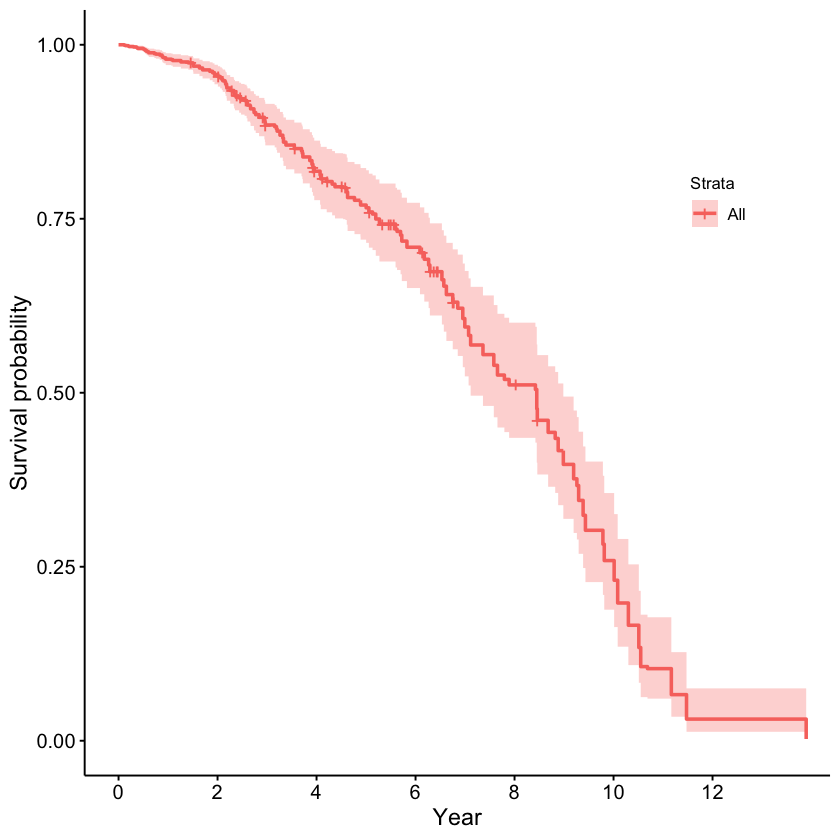

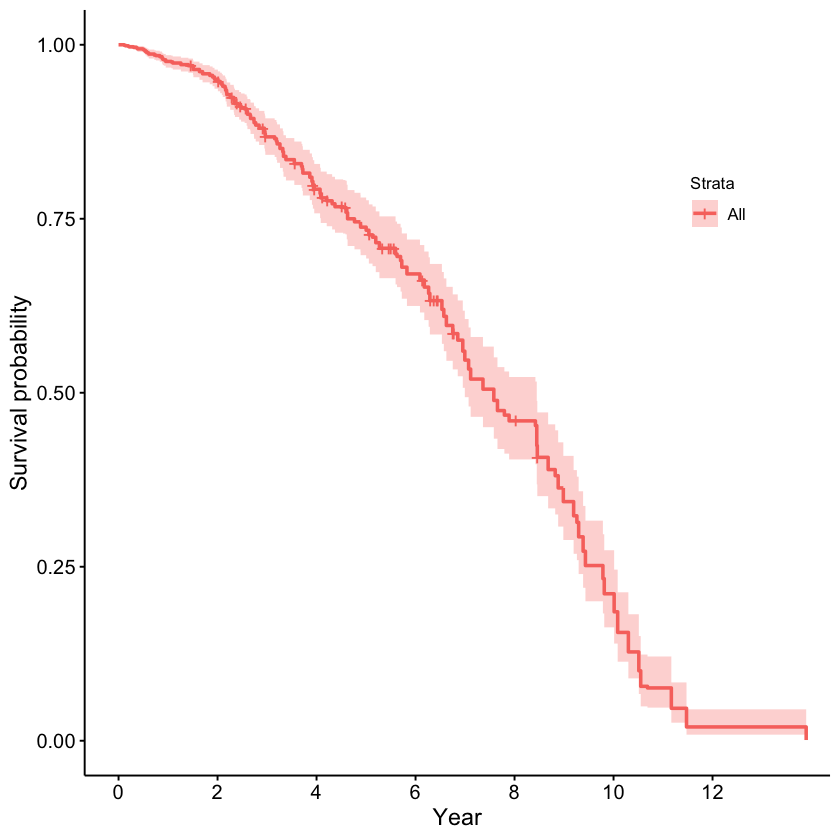

In [14]:
### (viii)
fit1 <- survfit(CPH1, data=pbcseq)
fit2 <- survfit(CPH2, data=pbcseq)

ggsurvplot(fit1, xscale="d_y", xlab="Year", break.time.by = 365.25*2,
           legend = c(0.85, 0.75), ylim=c(0,1))

ggsurvplot(fit2, xscale="d_y", xlab="Year", break.time.by = 365.25*2,
           legend = c(0.85, 0.75), ylim=c(0,1))